In [17]:
import pandas as pd
import numpy as np
import seaborn as sbn
import matplotlib.pyplot as plot
from datetime import date
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans

In [18]:
file = pd.read_csv("new_ifood_df.csv")
file.head()

,Unnamed: 0,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,Z_CostContact,Z_Revenue,Response,Age,Customer_Days,MntTotal,MntRegularProds,AcceptedCmpOverall,education_Status,marital_Status
0,0,58138.0,0,0,58,635,88,546,172,88,...,3,11,1,63,2822,1529,1441,0,Graduation,Single
1,1,46344.0,1,1,38,11,1,6,2,1,...,3,11,0,66,2272,21,15,0,Graduation,Single
2,2,71613.0,0,0,26,426,49,127,111,21,...,3,11,0,55,2471,734,692,0,Graduation,Together
3,3,26646.0,1,0,26,11,4,20,10,3,...,3,11,0,36,2298,48,43,0,Graduation,Together
4,4,58293.0,1,0,94,173,43,118,46,27,...,3,11,0,39,2320,407,392,0,PhD,Married


C:\Users\gosho\AppData\Local\Temp\ipykernel_12424\2459896616.py:14: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


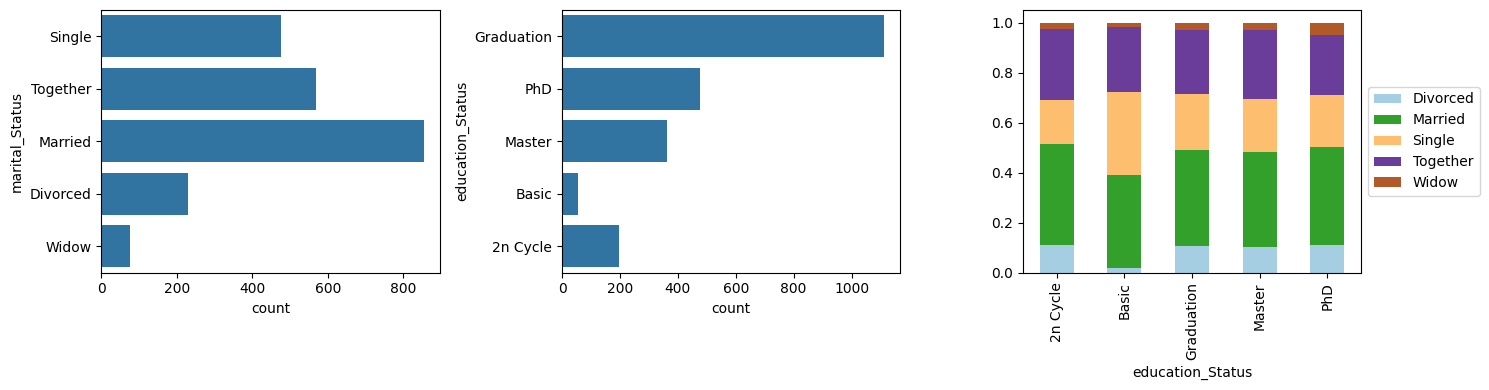

In [19]:

df = pd.DataFrame(file)

fig, x_ax = plot.subplots(1,3, figsize=(15,4))

sbn.countplot(file['marital_Status'], ax=x_ax[0])
sbn.countplot(file['education_Status'], ax=x_ax[1])

plt = file.groupby(['marital_Status', 'education_Status']).size().reset_index().pivot(columns='marital_Status', index='education_Status', values=0)
plt.apply(lambda x: x/x.sum(), axis=1).plot(kind='bar', stacked=True, ax=x_ax[2], colormap='Paired')

plot.legend(loc='center left', bbox_to_anchor=(1.0,0.5))
plot.tight_layout()

fig.show()

In [10]:
file

,Unnamed: 0,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,Z_CostContact,Z_Revenue,Response,Age,Customer_Days,MntTotal,MntRegularProds,AcceptedCmpOverall,education_Status,marital_Status
0,0,58138.0,0,0,58,635,88,546,172,88,...,3,11,1,63,2822,1529,1441,0,Graduation,Single
1,1,46344.0,1,1,38,11,1,6,2,1,...,3,11,0,66,2272,21,15,0,Graduation,Single
2,2,71613.0,0,0,26,426,49,127,111,21,...,3,11,0,55,2471,734,692,0,Graduation,Together
3,3,26646.0,1,0,26,11,4,20,10,3,...,3,11,0,36,2298,48,43,0,Graduation,Together
4,4,58293.0,1,0,94,173,43,118,46,27,...,3,11,0,39,2320,407,392,0,PhD,Married
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2200,2200,61223.0,0,1,46,709,43,182,42,118,...,3,11,0,53,2540,1094,847,0,Graduation,Married
2201,2201,64014.0,2,1,56,406,0,30,0,0,...,3,11,0,74,2178,436,428,1,PhD,Together
2202,2202,56981.0,0,0,91,908,48,217,32,12,...,3,11,0,39,2314,1217,1193,1,Graduation,Divorced
2203,2203,69245.0,0,1,8,428,30,214,80,30,...,3,11,0,64,2315,782,721,0,Master,Together


show percentage of web visits that turned into possible purchases? 

- is there a correlations between income and purchases? Where the purchases are made? What is purchased?

- does education or marital status affect anything?


In [24]:
col_to_move = df.pop('Age')
df.insert(2, 'Age', col_to_move)